# Proyecto Módulo 2

## Diplomado en Ciencia de Datos

## Aldo Alejandro Gallegos Ruiz

### Importación de Librerías

In [1]:
import json
import numpy as np
import pandas as pd 
import os
import glob
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from varclushi import VarClusHi
import seaborn as sns

import cufflinks as cf
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from scipy.stats import ks_2samp
from varclushi import VarClusHi

cf.go_offline()
pd.set_option('display.max_columns', None)

# Carga de datos

In [2]:
directorio = 'C:/Users/aldol/Programming/Diplo/bizilian_ecommerce'

patron_csv = '*.csv'

dataframes_csv = []

for archivo in glob.glob(os.path.join(directorio, patron_csv)):

    nombre_archivo = os.path.splitext(os.path.basename(archivo))[0]

    df_tempo = pd.read_csv(archivo)
    globals()[nombre_archivo] = df_tempo

## Información

In [3]:
olist_customers_dataset.shape, olist_customers_dataset.columns

((84525, 5),
 Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
        'customer_city', 'customer_state'],
       dtype='object'))

In [4]:
olist_geolocation_dataset.shape, olist_geolocation_dataset.columns

((850139, 5),
 Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
        'geolocation_city', 'geolocation_state'],
       dtype='object'))

In [5]:
olist_order_items_dataset.shape, olist_order_items_dataset.columns

((95752, 7),
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value'],
       dtype='object'))

In [6]:
olist_order_payments_dataset.shape, olist_order_payments_dataset.columns

((88303, 5),
 Index(['order_id', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'))

In [7]:
olist_order_reviews_dataset.shape, olist_order_reviews_dataset.columns

((84340, 7),
 Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
        'review_comment_message', 'review_creation_date',
        'review_answer_timestamp'],
       dtype='object'))

In [8]:
olist_orders_dataset.shape, olist_orders_dataset.columns

((84525, 8),
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'))

In [9]:
olist_products_dataset.shape, olist_products_dataset.columns

((28008, 9),
 Index(['product_id', 'product_category_name', 'product_name_lenght',
        'product_description_lenght', 'product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm'],
       dtype='object'))

In [10]:
olist_sellers_dataset.shape, olist_sellers_dataset.columns

((2631, 4),
 Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object'))

# Tabla unificada

In [11]:
merged_df = olist_order_payments_dataset.merge(olist_orders_dataset, on='order_id', how='inner') \
                  .merge(olist_order_reviews_dataset, on='order_id', how='inner') \
                  .merge(olist_order_items_dataset, on='order_id', how='inner') \
                  .merge(olist_customers_dataset,on='customer_id', how='inner') \
                  .merge(olist_products_dataset,on='product_id', how='inner') \
                    .merge(olist_sellers_dataset,on='seller_id', how='inner') \
                  .merge(olist_geolocation_dataset,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix', how='inner')

In [12]:
merged_df.isna().cumsum().tail(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
4681203,0,0,0,0,0,0,0,0,277,52670,103689,0,0,0,4156804,2680731,0,0,0,0,0,0,0,0,0,0,0,0,69215,69215,69215,69215,762,762,762,762,0,0,0,0,0,0,0,0


# Limpieza de datos

## Pasar fechas a datetime

In [13]:
merged_df=merged_df.copy()
cols=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date']
for col in cols:
    merged_df[col]=pd.to_datetime(merged_df[col])
merged_df.dtypes

order_id                                 object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date                     object
review_answer_timestamp                  object
order_item_id                             int64
product_id                               object
seller_id                               

## Campos geolocation lat y lon

In [14]:
merged_df=merged_df.drop(columns=['geolocation_lat', 'geolocation_lng']).drop_duplicates().reset_index(drop=True)

In [15]:
merged_df.shape

(57968, 42)

## Imputacion de los valores ausentes

In [16]:
merged_df.isna().cumsum().tail(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state
57967,0,0,0,0,0,0,0,0,3,640,1264,0,0,0,51187,33147,0,0,0,0,0,0,0,0,0,0,0,0,742,742,742,742,12,12,12,12,0,0,0,0,0,0


Debido a que todo producto tiene un nombre y descripción, resultaría conveniente imputar por la media

In [17]:
var_long_prod=['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
imputador_media = SimpleImputer(strategy='median')
merged_df[var_long_prod]=imputador_media.fit_transform(merged_df[var_long_prod])

### Imputacion por media para las variables de peso y tamaño

In [18]:
var_tamano_peso=['product_weight_g',	'product_length_cm',	'product_height_cm',	'product_width_cm']
imputador_media = SimpleImputer(strategy='median')
merged_df[var_tamano_peso]=imputador_media.fit_transform(merged_df[var_tamano_peso])

### Imputacion por media para las variables de fecha

In [19]:
merged_df.loc[merged_df['review_score']==1, 'review_comment_title'].value_counts()

review_comment_title
Não recomendo                40
não recomendo                23
Ruim                         21
Produto errado               21
Produto não entregue         17
                             ..
O produto veio errado         1
Decepcionada com a compra     1
Não recebi meu produto        1
nao recomendo o produto       1
Muito Boa                     1
Name: count, Length: 477, dtype: int64

In [20]:
merged_df.loc[pd.isna(merged_df['order_approved_at'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state
29139,5cf925b116421afa85ee25e99b4c34fb,1,boleto,1,106.81,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,4930703ae4fccd4d2d3b44cf63a9e632,5,NaN,NaN,2017-03-10 00:00:00,2017-03-13 00:18:46,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 15:48:35,79.99,26.82,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,3426,sao paulo,SP,3426,sao paulo,SP
29140,5cf925b116421afa85ee25e99b4c34fb,1,boleto,1,106.81,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,4930703ae4fccd4d2d3b44cf63a9e632,5,NaN,NaN,2017-03-10 00:00:00,2017-03-13 00:18:46,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 15:48:35,79.99,26.82,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,3426,sao paulo,SP,3426,são paulo,SP
30586,d69e5d356402adc8cf17e08b5033acfb,1,boleto,1,163.43,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,6540ad5bc5a8bfc9ede2d495bfb940dd,5,NaN,Excelente produto,2017-03-03 00:00:00,2017-03-04 21:06:06,1,cae2e38942c8489d9d7a87a3f525c06b,cca3071e3e9bb7d12640c9fbe2301306,2017-02-26 01:28:47,149.80,13.63,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,moveis_decoracao,54.0,586.0,1.0,1700.0,33.0,8.0,23.0,14940,ibitinga,SP,14940,ibitinga,SP


In [21]:
fechas_vacias=['order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date']

merged_df['order_approved_at']=merged_df['order_approved_at'].fillna(
    merged_df['order_purchase_timestamp']+(merged_df['order_approved_at']-merged_df['order_purchase_timestamp']).agg('mean'))

merged_df['order_delivered_carrier_date']=merged_df['order_delivered_carrier_date'].fillna(
    merged_df['order_purchase_timestamp']+(merged_df['order_delivered_carrier_date']-merged_df['order_purchase_timestamp']).agg('mean'))

merged_df['order_delivered_customer_date']=merged_df['order_delivered_customer_date'].fillna(
    merged_df['order_purchase_timestamp']+(merged_df['order_delivered_customer_date']-merged_df['order_purchase_timestamp']).agg('mean'))

## Resultado p-value de la prueba KS


Esto para demostrar que las variables imputadas no modificaron su distribución normal

In [22]:
lista = []
for i in fechas_vacias+var_tamano_peso+var_long_prod:
    resultado_ks = ks_2samp(merged_df[i].dropna(), merged_df[i])
    lista.append([i,resultado_ks.pvalue])

In [23]:
resultado_df = pd.DataFrame(lista)
resultado_df

,0,1
0,order_approved_at,1.0
1,order_delivered_carrier_date,1.0
2,order_delivered_customer_date,1.0
3,product_weight_g,1.0
4,product_length_cm,1.0
5,product_height_cm,1.0
6,product_width_cm,1.0
7,product_name_lenght,1.0
8,product_description_lenght,1.0
9,product_photos_qty,1.0


# Precio mayor a cero

In [24]:
merged_df.loc[merged_df['payment_value']==0, 'review_comment_message']

16290    Produto demorou a chegar e veio diferente do q...
16291    Produto demorou a chegar e veio diferente do q...
29701    A mercadoria não foi entregue. Entrara em cont...
29702    A mercadoria não foi entregue. Entrara em cont...
41629                                                  NaN
54349    A mercadoria não foi entregue. Entrara em cont...
54350    A mercadoria não foi entregue. Entrara em cont...
Name: review_comment_message, dtype: object

In [25]:
merged_df=merged_df.loc[merged_df['payment_value']>0]

In [26]:
merged_df.shape

(57961, 42)

# Variables continuas y discretas

In [27]:
varc=['price',	'freight_value','product_name_lenght',	'product_description_lenght',	'product_photos_qty',	
      'product_weight_g',	'product_length_cm',	'product_height_cm',	'product_width_cm','seller_zip_code_prefix' , 
      'geolocation_zip_code_prefix', 'customer_zip_code_prefix']

vard=['payment_sequential','payment_installments','review_score','payment_type','order_status','customer_city',	'customer_state',
      'product_category_name','seller_city',	'seller_state','geolocation_city',	'geolocation_state']

# Visualización gráfica

In [28]:
import base64
from io import BytesIO
from IPython.display import HTML

In [29]:
def graficar_histogramas(df, columnas, num_col):  
        if not isinstance(df, pd.DataFrame) or df.empty:
            print("El argumento proporcionado no es un DataFrame de Pandas o está vacío")
            return
        num_col = num_col+1
        width_percent = 100 // num_col

        html_str = '<div style="display:flex;flex-wrap:wrap;">'

        for columna in columnas:
            if columna not in df.columns:
                print(f"La columna '{columna}' no existe en el DataFrame.")
                continue

            ax = sns.histplot(df[columna])
            buffer = BytesIO()
            ax.figure.savefig(buffer, format='png')
            buffer.seek(0)
            image_png = buffer.getvalue()
            buffer.close()
            graphic = base64.b64encode(image_png)
            graphic = graphic.decode('utf-8')
            html_str += f'<div style="width:{width_percent}%;margin:0.5%;"><img src="data:image/png;base64,{graphic}" style="width:100%;"/></div>'

            ax.figure.clf()

        html_str += '</div>'
        display(HTML(html_str))

def mapa_calor(datos):
    if isinstance(datos, pd.DataFrame):
        datos = datos.select_dtypes(include=['int', 'float'])
        matriz_correlacion = datos.corr()

        sns.set(rc={'figure.figsize':(13,8)})

        sns.heatmap(matriz_correlacion, annot=True, annot_kws={'size': 6})

        sns.reset_orig()
    else:
        print("Debes ingresar un DataFrame.")


def graficar_bh(df, columnas, num_col):
    if not isinstance(df, pd.DataFrame) or df.empty:
        print("El argumento proporcionado no es un DataFrame de Pandas o está vacío")
        return
    num_col = num_col +1
    width_percent = 100 // num_col 
    html_str = '<div style="display:flex;flex-wrap:wrap;">'

    for columna in columnas:
        if columna not in df.columns:
            print(f"La columna '{columna}' no existe en el DataFrame.")
            continue

        conteos = df[columna].value_counts()
        ax = sns.barplot(x=conteos, y=conteos.index, orient="h")

        buffer = BytesIO()
        ax.figure.savefig(buffer, format='png')
        buffer.seek(0)

        image_png = buffer.getvalue()
        buffer.close()
        graphic = base64.b64encode(image_png)
        graphic = graphic.decode('utf-8')

        html_str += f'<div style="width:{width_percent}%;margin:0.5%;"><img src="data:image/png;base64,{graphic}" style="width:100%;"/></div>'

        ax.figure.clf()

    html_str += '</div>'
    display(HTML(html_str))

def graficar_densidades(df,columnas,num_col):
    if not isinstance(df, pd.DataFrame):
        return "El argumento proporcionado no es un DataFrame."
    if df.empty:
        return "El DataFrame está vacío."
    
        
    # Establecer el número de columnas para los gráficos
    num_col = num_col +1
    html_str = '<div style="display:flex;flex-wrap:wrap;">'
    
    # Calcular el ancho de cada imagen basado en el número de columnas deseado
    width = 100 // num_col
    
    for cont in columnas:
        ax = sns.kdeplot(df[cont], label=cont, fill=True)
        ax.set_title(f'Gráfico de Densidad para {cont}')
        ax.set_xlabel('Valor')
        ax.set_ylabel('Densidad')
        
        # Guardar la gráfica en un buffer
        buffer = BytesIO()
        ax.figure.savefig(buffer, format='png')
        buffer.seek(0)
        
        # Codificar la imagen en base64 y decodificarla para incrustarla en HTML
        image_png = buffer.getvalue()
        buffer.close()
        graphic = base64.b64encode(image_png)
        graphic = graphic.decode('utf-8')
        
        # Añadir la imagen al HTML. El ancho se ajusta dinámicamente según 'num_col'
        html_str += f'<div style="width:{width}%;margin:0.5%;"><img src="data:image/png;base64,{graphic}" style="width:100%;"/></div>'
        
        # Limpiar la figura actual para la siguiente gráfica
        ax.figure.clf()

    # Cerrar el div del HTML y mostrar los resultados
    html_str += '</div>'
    display(HTML(html_str))


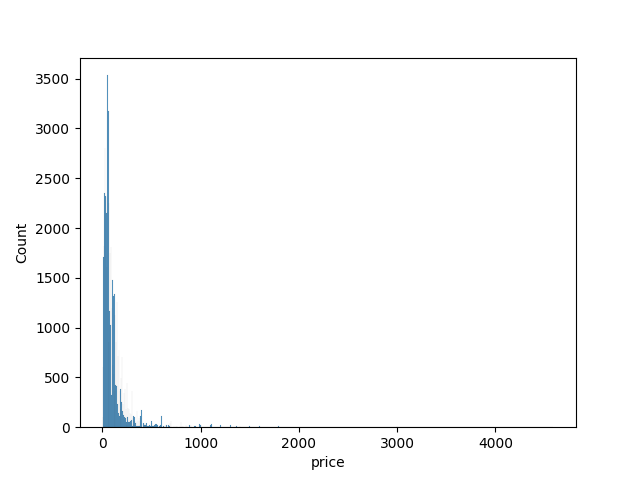
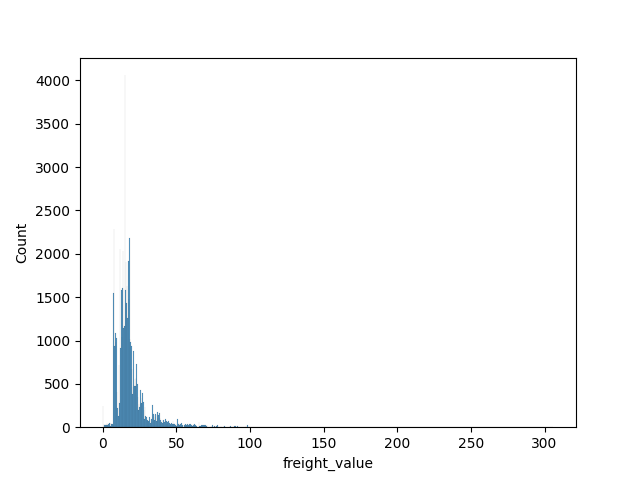
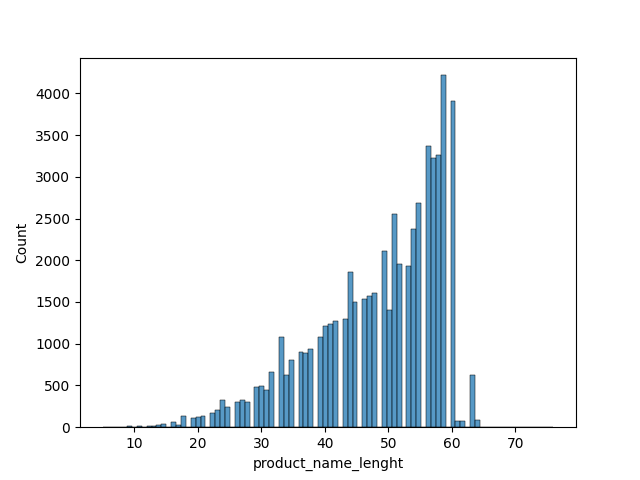
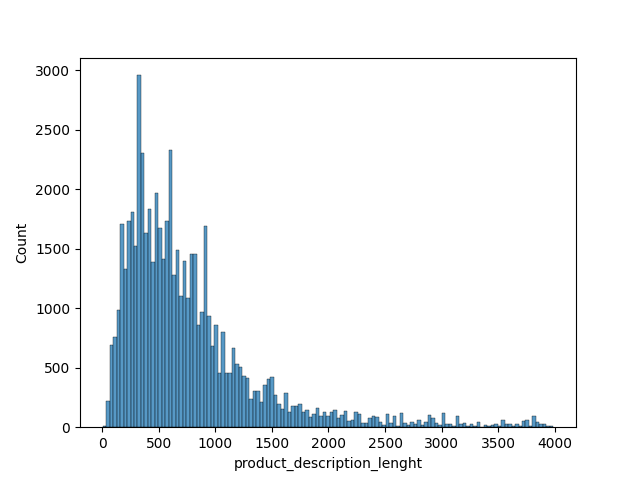
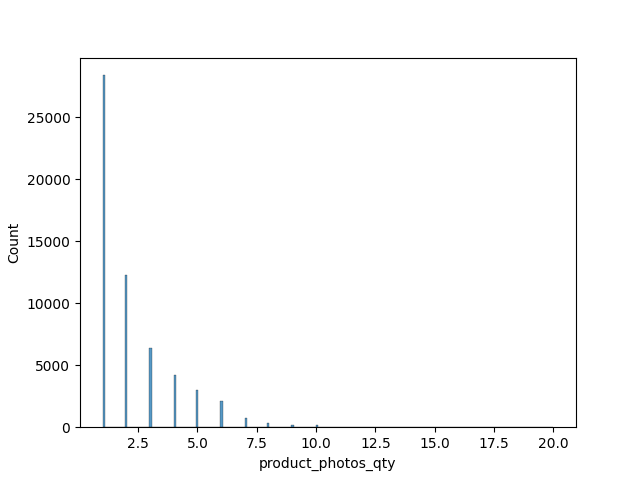
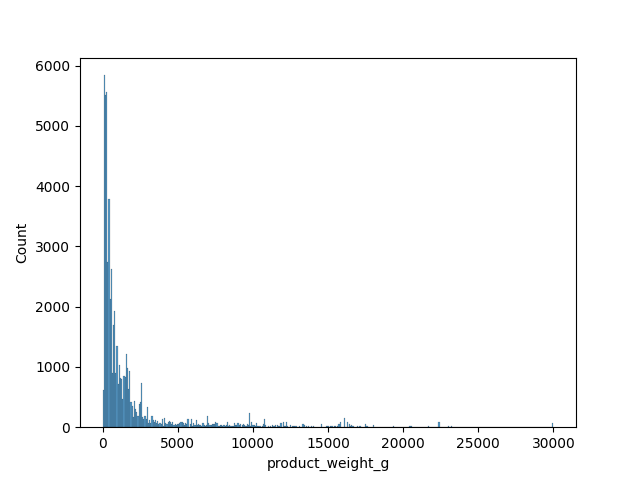
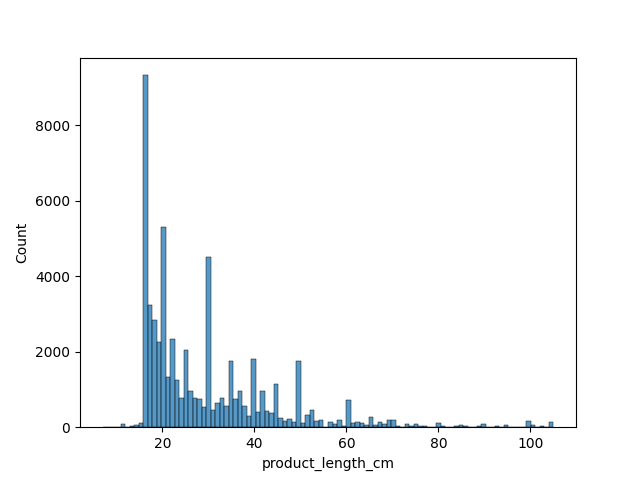
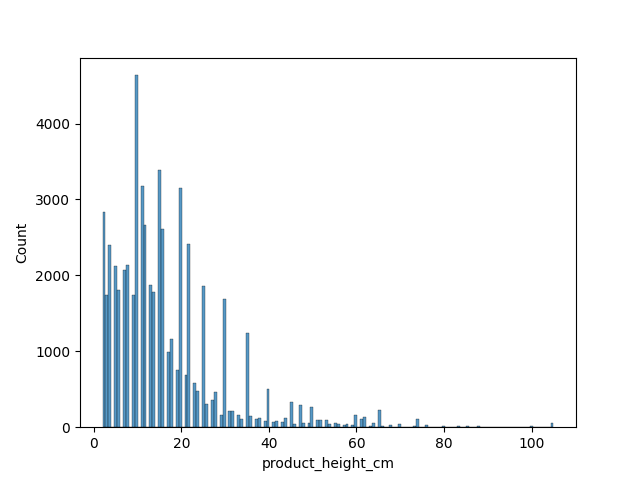
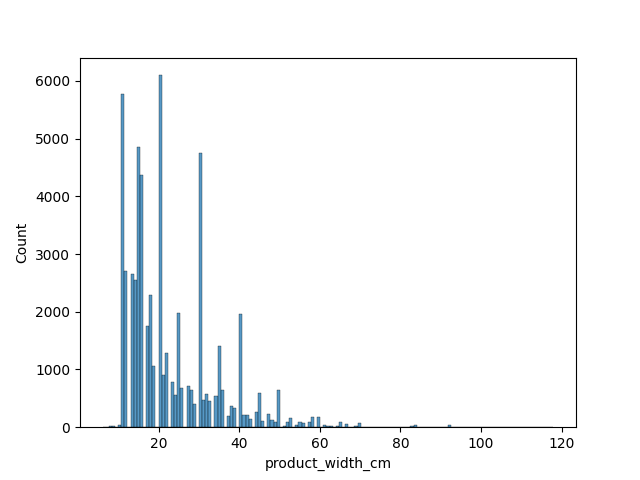
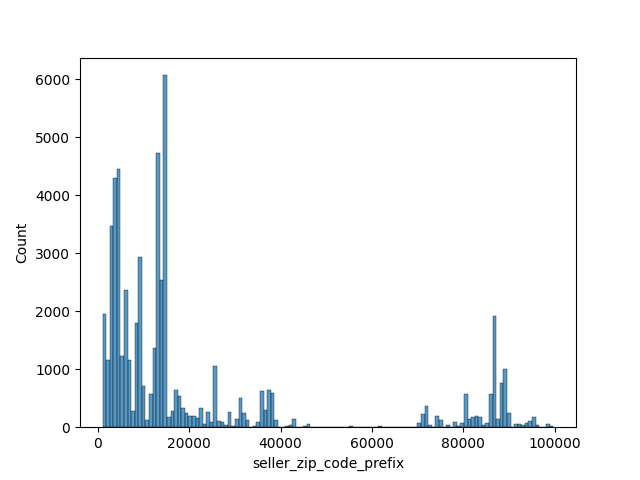
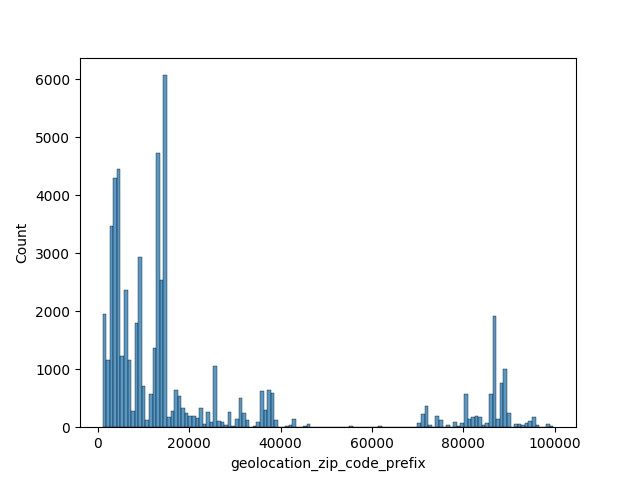
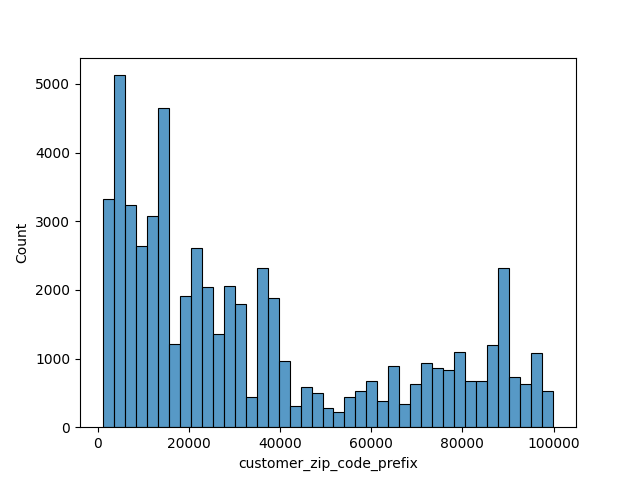

<Figure size 640x480 with 0 Axes>

In [30]:
graficar_histogramas(merged_df,varc,2)

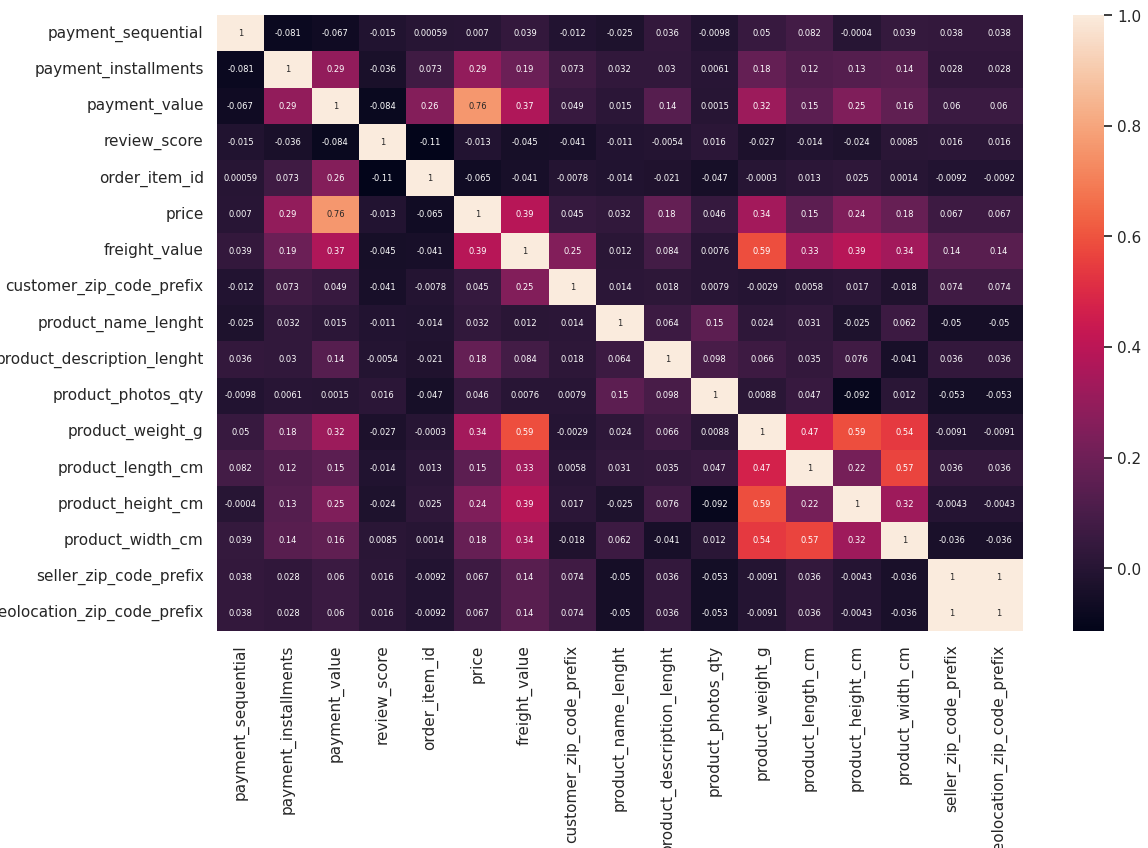

In [31]:
mapa_calor(merged_df)


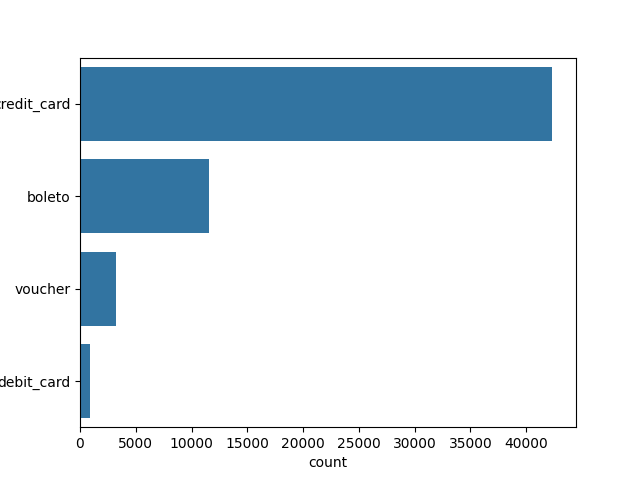
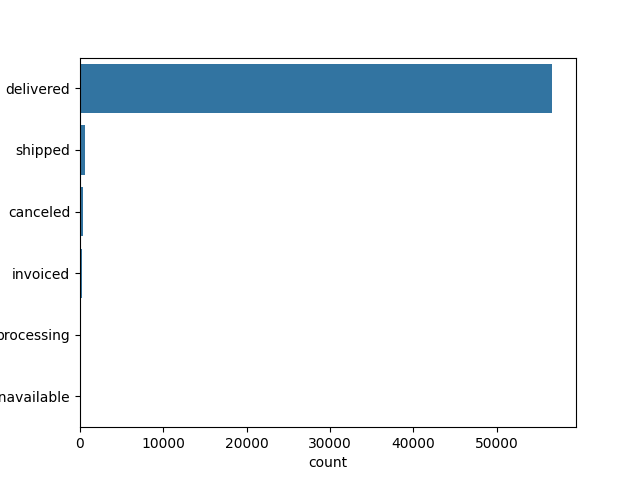
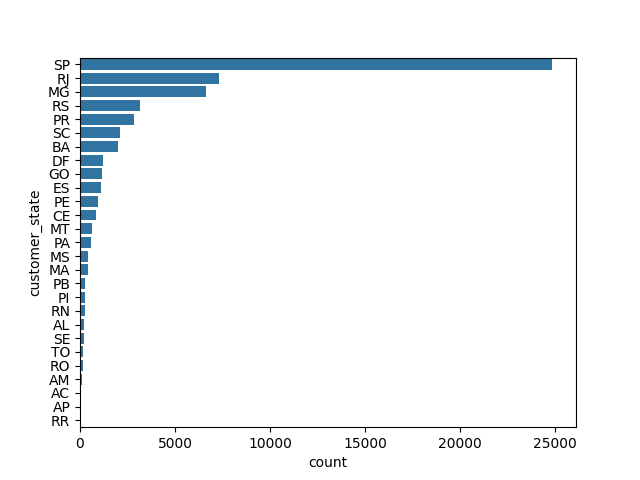
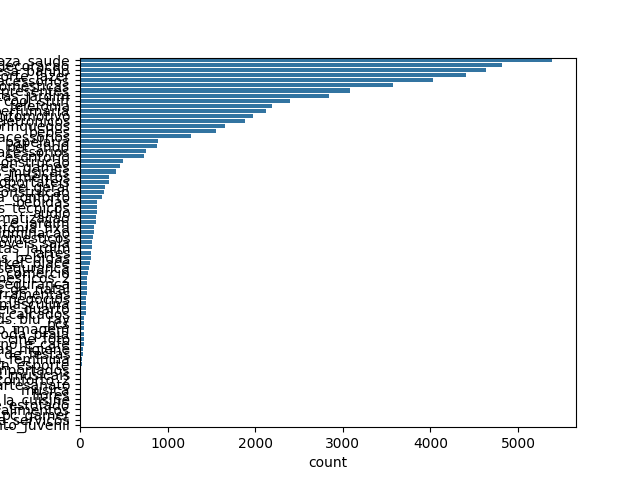
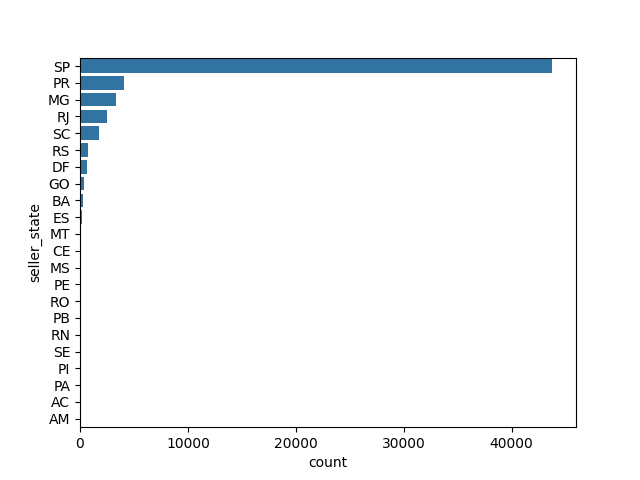
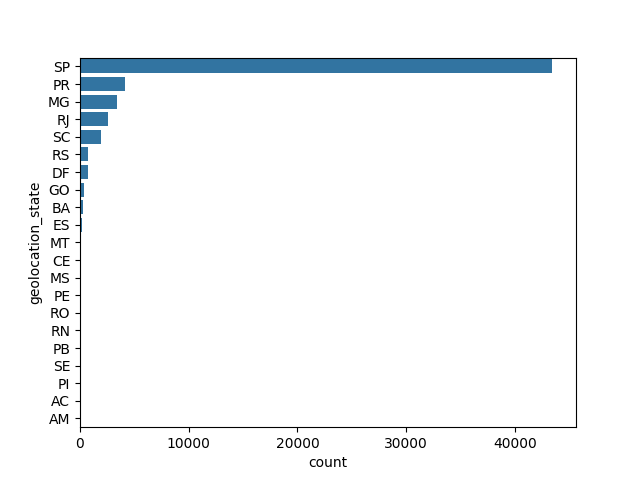

In [32]:
graficar_bh(merged_df,['payment_type','order_status',	'customer_state','product_category_name',	'seller_state',	'geolocation_state'],2)


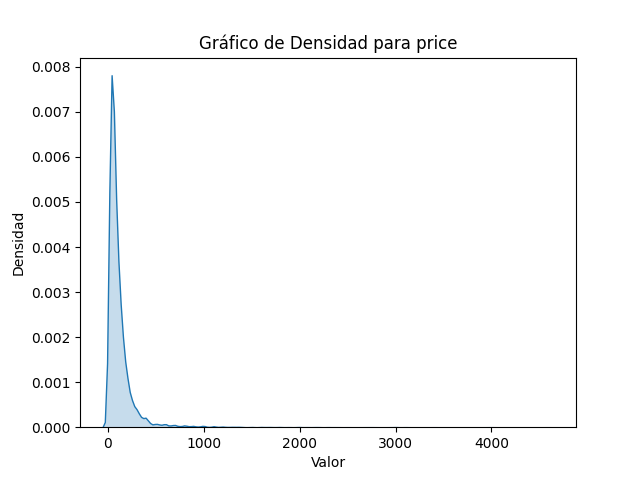
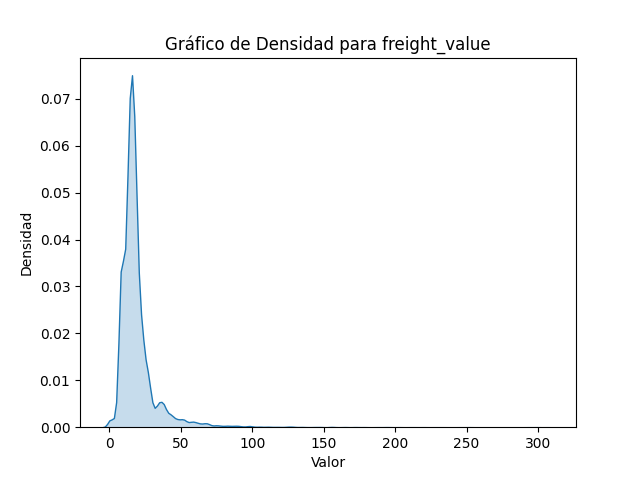
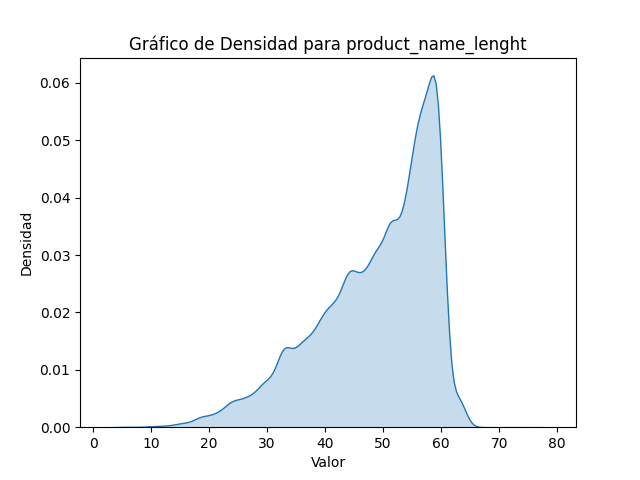
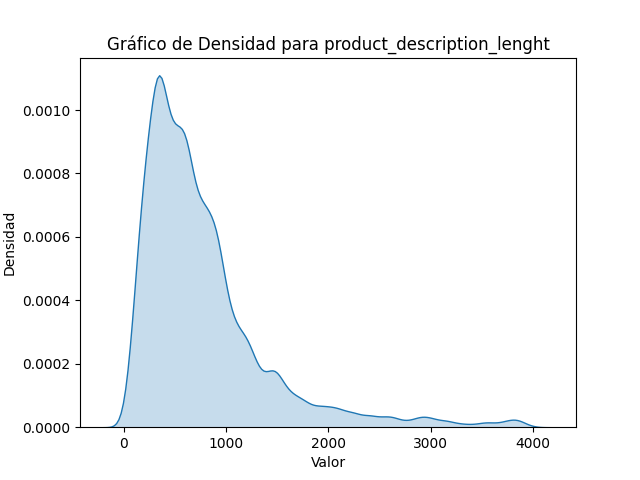
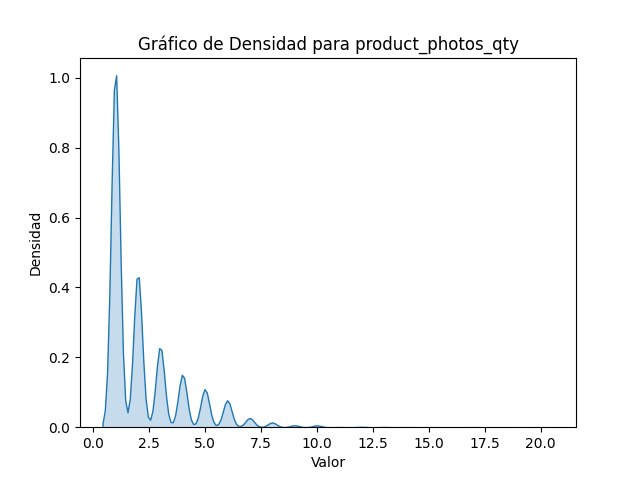
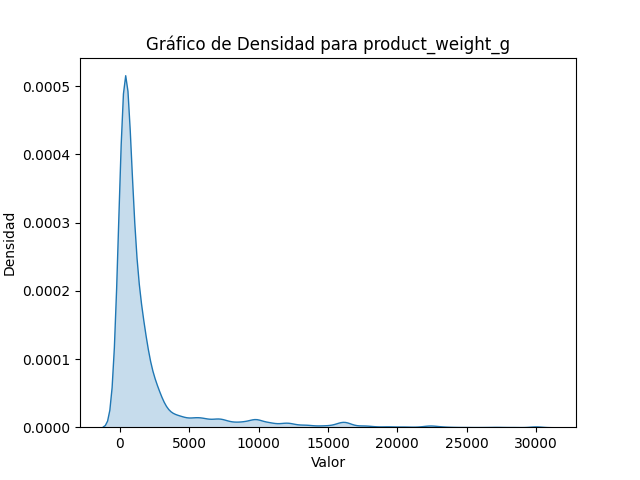
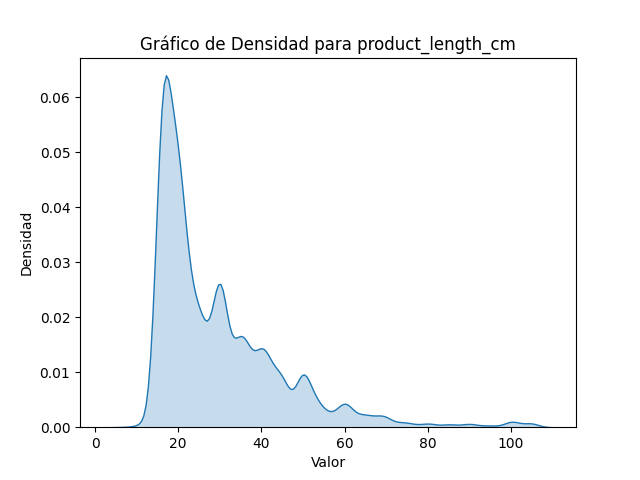
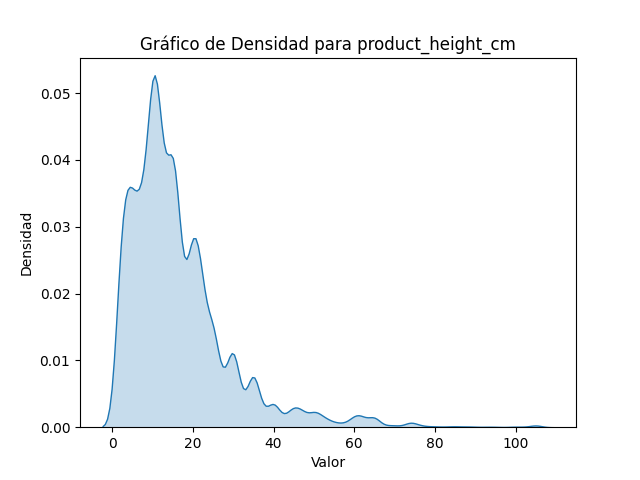
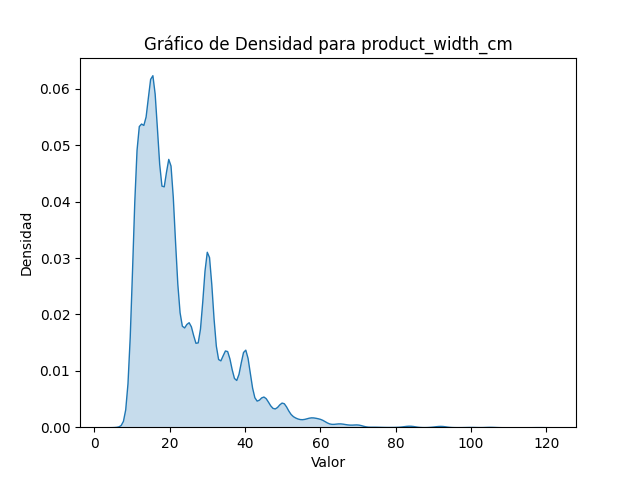
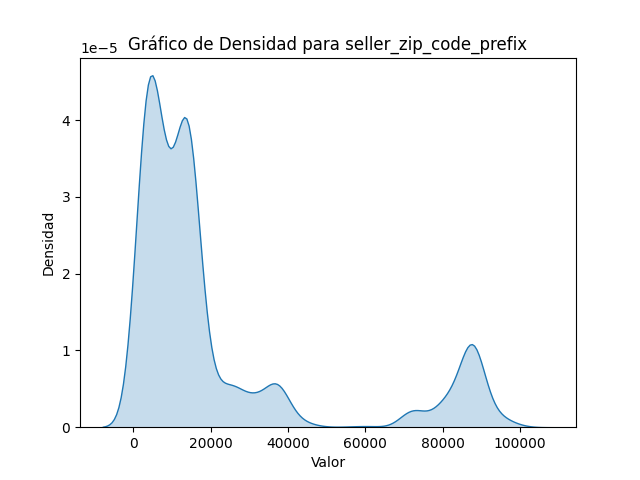
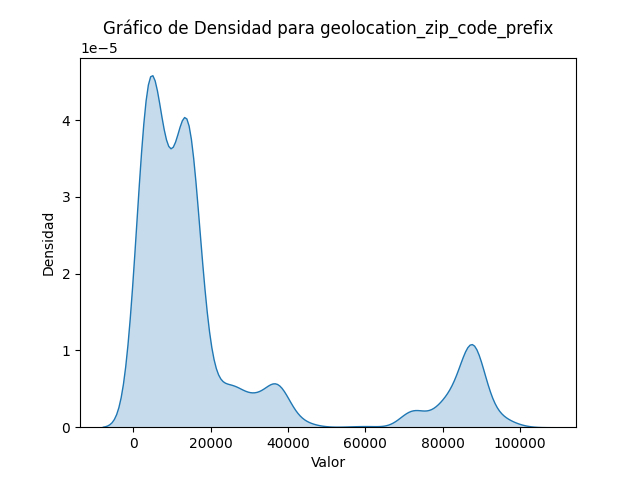
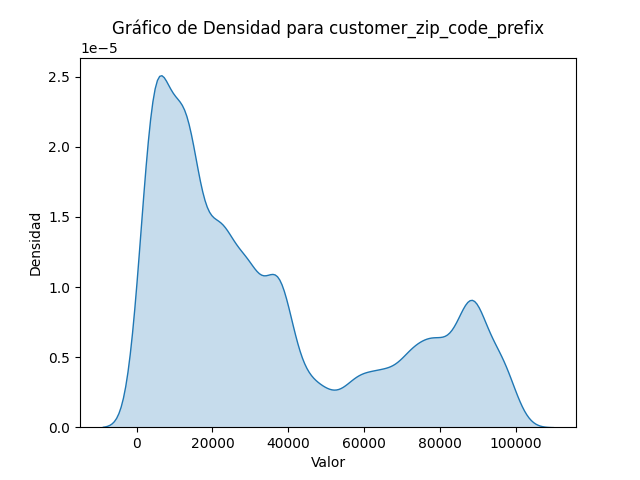

In [33]:
graficar_densidades(merged_df,varc,2)

# Variable objetivo

Con los datos con los que contamos buscaremos predecir el precio total que pagará el cliente por su compra

In [29]:
np.std(merged_df['payment_value'])

239.12929659055865

In [30]:
merged_df['payment_value'].describe()

count    57961.000000
mean       166.752551
std        239.131359
min          0.010000
25%         59.130000
50%        105.370000
75%        186.620000
max       7274.880000
Name: payment_value, dtype: float64

In [31]:
merged_df.shape

(57961, 42)

# Construcción de TAD

In [32]:
def construction_dat(merged_df):
    # Compras de los clientes
    merged_df= merged_df.merge(merged_df.groupby('customer_id') \
            .agg(
            cantidad_vendedores_por_cliente=('seller_id','count'),
            cantidad_productos_por_cliente=('product_id','count')
            ),
            left_on='customer_id',
            right_index=True,
            how='left'
    )

    merged_df= merged_df.merge(merged_df.groupby('order_id') \
            .agg(
            cantidad_compras=('customer_id','count'),
            cantidad_vendedores_por_compra=('seller_id','count'),
            cantidad_productos_por_compra=('product_id','count')
            ),
            left_on='order_id',
            right_index=True,
            how='left'
    )
    ## Freight_value
    merged_df['rel_freight_payment']=merged_df.freight_value/(merged_df.payment_value+1)
    merged_df.freight_value
    merged_df= merged_df.merge(merged_df.groupby('product_id') \
            .agg( 
            median_freight_prod=('freight_value','median'),
            max_freight_prod=('freight_value','max'),
            suma_freight_prod=('freight_value','min')
            ),
            left_on='product_id',
            right_index=True,
            how='left'
    )
    merged_df.freight_value
    merged_df= merged_df.merge(merged_df.groupby('customer_id') \
            .agg( 
            median_freight_cust=('freight_value','median'),
            max_freight_cust=('freight_value','max'),
            suma_freight_cust=('freight_value','min')
            ),
            left_on='customer_id',
            right_index=True,
            how='left'
    )
    # Payment sequencial
    merged_df= merged_df.merge(merged_df.groupby('customer_id') \
            .agg( 
            med_payment_sequential=('payment_sequential','median'),
            max_payment_sequential=('payment_sequential','max'),
            suma_payment_sequential=('payment_sequential','min')
            ),
            left_on='customer_id',
            right_index=True,
            how='left'
    )
    # Tamaño del producto
    merged_df['volumen_producto']=merged_df['product_length_cm']*merged_df['product_height_cm']*merged_df['product_width_cm']
    merged_df=merged_df.merge(
        merged_df.groupby('customer_id').agg(
            med_volumen_prod=('volumen_producto','median'),
            max_volumen_prod=('volumen_producto','max'),
            min_volumen_prod=('volumen_producto','min')
        ),
        left_on='customer_id',
        right_index=True,
        how='left'
    )
    # Peso del producto
    merged_df=merged_df.merge(
        merged_df.groupby('customer_id').agg(
            med_peso_prod=('product_weight_g','median'),
            max_peso_prod=('product_weight_g','max'),
            min_peso_prod=('product_weight_g','min')
        ),
        left_on='customer_id',
        right_index=True,
        how='left'
    )
    # Payment installment
    merged_df=merged_df.merge(
        merged_df.groupby('customer_id').agg(
            pay_install_max=('payment_installments','max'),
            pay_install_prom=('payment_installments','mean')
        ),
        left_on='customer_id',
        right_index=True,
        how='left'
    )
    # Pedidos que son de la misma ciudad
    merged_df['pedidos_misma_ciudad'] = merged_df.apply(lambda row: 1 if row['customer_city'] == row['geolocation_city'] else 0, axis=1)
    # Diferencia en fechas
    merged_df['dif_purchase_delivered_carrier']=(merged_df.order_delivered_carrier_date-merged_df.order_purchase_timestamp).dt.days.astype(int)
    merged_df['dif_purchase_delivered_customer']=(merged_df.order_delivered_customer_date-merged_df.order_purchase_timestamp).dt.days.astype(int)
    merged_df['dif_delivered_customer_estimated']=(merged_df.order_estimated_delivery_date-merged_df.order_delivered_customer_date).dt.days.astype(int)
    merged_df=merged_df.merge(
        merged_df.groupby('customer_id').agg(
            med_dif_purchase_delivered_carrier=('dif_purchase_delivered_carrier','median'),
            min_dif_purchase_delivered_carrier=('dif_purchase_delivered_carrier','min'),
            max_dif_purchase_delivered_carrier=('dif_purchase_delivered_carrier','max'),
        ),
        left_on='customer_id',
        right_index=True,
        how='left'
    )
    
    return merged_df

In [33]:
merged_df=construction_dat(merged_df)

---- Fin de la TAD ----

## Campo del Q

In [34]:
def asignar_cuatrimestre(mes):
        if mes in [1, 2, 3]:
            return 'Q1'
        elif mes in [4, 5, 6]:
            return 'Q2'
        elif mes in [7, 8, 9]:
            return 'Q3'
        elif mes in [10, 11, 12]:
            return 'Q4'

In [35]:
merged_df['Quarter'] = merged_df.apply(lambda row: f"{asignar_cuatrimestre(row['order_purchase_timestamp'].month)}-{row['order_purchase_timestamp'].year}", axis=1)

In [36]:
merged_df.shape

(57961, 74)

# Pasar variables string a numéricas categóricas

In [37]:
granulares=['payment_type','order_status','customer_city','product_category_name',	'customer_state','seller_city',	'seller_state','geolocation_city',	'geolocation_state']

In [38]:
label_encoder = LabelEncoder()

for g in granulares:
    merged_df[g] = label_encoder.fit_transform(merged_df[g])


## Variables predictoras

In [39]:
tar='payment_value'
exclude=['order_id','customer_id','order_purchase_timestamp', 'review_creation_date', 'review_answer_timestamp',
          'order_approved_at', 'order_delivered_carrier_date',
         'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 'order_item_id',
          'product_id', 'seller_id', 'shipping_limit_date', 'customer_unique_id', 'geolocation_lat', 'geolocation_lng',
           'review_comment_title',	'review_comment_message',	 tar,'Quarter']
predictors = [c for c in merged_df.columns if c not in exclude]

#  Remosión de valores infinitos

El dataframe no cuenta con valores infinitos 

In [40]:
cols_with_infinity = merged_df[predictors].columns[~merged_df[predictors].apply(lambda x: np.isinf(x).any())].to_list()
print(f'Registros antes y después de remover infinitos: {merged_df[predictors].shape, merged_df[cols_with_infinity].shape}')

Registros antes y después de remover infinitos: ((57961, 55), (57961, 55))


# Remosión de variables unarias

El dataframe no cuenta con variables unarias

In [41]:
num_valores_unicos = merged_df[predictors].nunique()
columnas_a_mantener = num_valores_unicos[num_valores_unicos > 1].index
df_unaria = merged_df[columnas_a_mantener]
print(f'Las dimensiones de la tabla es:{merged_df[predictors].shape, df_unaria.shape}')

Las dimensiones de la tabla es:((57961, 55), (57961, 55))


## Detección y remoción de valores extremos.

In [42]:
from scipy.stats import zscore

In [43]:
def iqr(df):
    var= [col for col in df.columns if (df[col].dtype == 'float64') or (df[col].dtype == 'int64')]
    df_h=df[var]
    Q1 = df_h.quantile(0.25)
    Q3 = df_h.quantile(0.75)
    IQR = Q3 - Q1 
    mask_q =  ~(((df_h < (Q1 - 1.5 * IQR)) | (df_h > (Q3 + 1.5 * IQR)))).any(axis=1)
    print(f'Tamaño original {df_h.shape[0]}', f'Tras aplicar IQR: {df_h[mask_q].shape[0]} registros')
    df_h=df_h[mask_q]
    #return(df_h)

def z_score(df):
    var= [col for col in df.columns if (df[col].dtype == 'float64') or (df[col].dtype == 'int64')]
    df_h=df[var]
    Z_scores = df_h.apply(zscore)
    mask_z = (Z_scores > -3) & (Z_scores < 3)
    print(f'Tamaño original: {df_h.shape[0]}', f'Al aplicar el método Z-Score: {df_h[mask_z].shape[0]}')
    df_h=df_h[mask_z]
    #return(df_h)

def iso_forest(df,varc):
    var_num = [col for col in df.columns if (df[col].dtype == 'float64') or (df[col].dtype == 'int64')]
    df_h=df[varc]
    df_m=df[var_num]
    iso_forest = IsolationForest(n_estimators=100, random_state=42)
    iso_forest.fit(df_m)
    iso_preds = iso_forest.predict(df_m)
    df_iso=df[iso_preds==1]
    print(f'Tamaño original: {df_h.shape[0]}',f'Al aplicar el método Iso Forest: {df_iso.shape[0]}')
    #return (df_iso)

Para este caso utilizaremos tres métdos, y veremos cuántos registros detecta cada modelo como outliers

In [49]:
iqr(merged_df)

Tamaño original 57961 Tras aplicar IQR: 13768 registros


In [50]:
z_score(merged_df)

Tamaño original: 57961 Al aplicar el método Z-Score: 57961


In [51]:
iso_forest(merged_df,predictors)

Tamaño original: 57961 Al aplicar el método Iso Forest: 53661


# Variables altamente correlacionadas.

No hay variables con correlación 1 en valor absoluto.

In [44]:
df_corr=pd.DataFrame(merged_df[predictors+[tar]].corr()) 
df_corr['target_abs']=abs(df_corr['payment_value']) 
df_corr[['target_abs']].sort_values(by='target_abs',ascending=False)

,target_abs
payment_value,1.000000
price,0.761564
median_freight_prod,0.392176
max_freight_cust,0.381767
suma_freight_prod,0.378762
freight_value,0.367643
median_freight_cust,0.367303
suma_freight_cust,0.355992
max_peso_prod,0.324816
product_weight_g,0.318918


In [45]:
df_corr=pd.DataFrame(df_corr['target_abs'])
corr=df_corr.loc[df_corr['target_abs']>0.01].index.to_list()
merged_df_=merged_df[corr].drop_duplicates().reset_index(drop=True)

In [55]:
merged_df_.shape

(52692, 54)

## Identificación de clusters

In [56]:
def identificacion_clusters(df):
      vc = VarClusHi(df)
      vc.varclus() 
      conjuntos= vc.rsquare
      return(conjuntos)

In [57]:
identificacion_clusters(merged_df[predictors])

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,product_weight_g,0.860433,0.408757,0.236058
1,0,product_length_cm,0.355638,0.124402,0.735911
2,0,product_height_cm,0.514879,0.181848,0.592947
3,0,product_width_cm,0.469678,0.134676,0.612860
4,0,volumen_producto,0.920880,0.378699,0.127346
5,0,med_volumen_prod,0.921832,0.379232,0.125922
6,0,max_volumen_prod,0.915819,0.374551,0.134593
7,0,min_volumen_prod,0.916668,0.379750,0.134353
8,0,med_peso_prod,0.860843,0.409092,0.235496
9,0,max_peso_prod,0.855590,0.404649,0.242562


## Poder Predictivo con SelectKBest 

In [58]:
def seleccionar_kbest(df, variable_objetivo, num_variables_deseadas=10, funcion=f_classif):
    X = df.drop(columns=[variable_objetivo])
    y = df[variable_objetivo]
    kb = SelectKBest(k=num_variables_deseadas, score_func=funcion)
    kb.fit(X,y)
    variables_seleccionadas = list(kb.get_feature_names_out())
    return variables_seleccionadas

In [59]:
mejores = seleccionar_kbest(merged_df[predictors+[tar]],"payment_value",num_variables_deseadas=10)
mejores

['price',
 'cantidad_vendedores_por_cliente',
 'cantidad_productos_por_cliente',
 'cantidad_compras',
 'cantidad_vendedores_por_compra',
 'cantidad_productos_por_compra',
 'rel_freight_payment',
 'median_freight_cust',
 'max_freight_cust',
 'suma_freight_cust']

# Modelación supervisada

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, r2_score

# Split entrenamiento y prueba

In [48]:
seed_ = 200524

In [49]:
X = merged_df_.drop(columns='payment_value').copy()
y = merged_df_[tar].copy()

Xt, Xv, yt, yv = train_test_split(X, y, test_size=.2, random_state=seed_)

In [59]:
X.shape, Xv.shape

((52692, 53), (10539, 53))

## Regresión Lineal

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
#Lineal
lr = LinearRegression(fit_intercept=True)
lr.fit(Xt, yt)

LinearRegression()

In [66]:
y_p=lr.predict(Xt)
print('Train:')
print(f'MAE: {mean_absolute_error(yt, y_p)}')
print(f'MSE: {mean_squared_error(yt, y_p)}')
print(f'R2: {r2_score(yt , y_p)}')

Train:
MAE: 30.591455608321958
MSE: 7606.757668940821
R2: 0.8163207786952629


In [67]:
y_p=lr.predict(Xv)
print('Validation:')
print(f'MAE: {mean_absolute_error(yv, y_p)}')
print(f'MSE: {mean_squared_error(yv, y_p)}')
print(f'R2: {r2_score(yv , y_p)}')

Validation:
MAE: 31.751982538743956
MSE: 9934.160956922884
R2: 0.788511708898153


# Árbol de decisión

In [50]:
# Árboles:
tree_reg = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, min_samples_split=30, min_samples_leaf=12)

tree_reg.fit(Xt, yt)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=12, min_samples_split=30)

In [51]:
regressions = tree_reg.predict(Xt)
print('Train:')
print(f'MAE: {mean_absolute_error(yt, regressions)}')
print(f'MSE: {mean_squared_error(yt, regressions)}')
print(f'R2: {r2_score(yt, regressions)}')

Train:
MAE: 28.952289991222454
MSE: 8616.039785356912
R2: 0.7919497968277786


In [52]:
regressions = tree_reg.predict(Xv)
print('Val:')
print(f'MAE: {mean_absolute_error(yv, regressions)}')
print(f'MSE: {mean_squared_error(yv, regressions)}')
print(f'R2: {r2_score(yv, regressions)}')

Val:
MAE: 29.913756997817625
MSE: 11105.237168505075
R2: 0.7635806746808196


# Redes neuronales

In [92]:
tree_reg = MLPRegressor(hidden_layer_sizes=(5, 5, 5), batch_size=100, learning_rate='adaptive')
tree_reg.fit(Xt, yt)

MLPRegressor(batch_size=100, hidden_layer_sizes=(5, 5, 5),
             learning_rate='adaptive')

In [93]:
regressions = tree_reg.predict(Xt)
print('Train:')
print(f'MAE: {mean_absolute_error(yt, regressions)}')
print(f'MSE: {mean_squared_error(yt, regressions)}')
print(f'R2: {r2_score(yt, regressions)}')

Train:
MAE: 32.54311004897333
MSE: 8548.177003645342
R2: 0.7935884691035171


In [94]:
regressions = tree_reg.predict(Xv)
print('Val:')
print(f'MAE: {mean_absolute_error(yv, regressions)}')
print(f'MSE: {mean_squared_error(yv, regressions)}')
print(f'R2: {r2_score(yv, regressions)}')

Val:
MAE: 34.050844932218276
MSE: 11015.213017285609
R2: 0.7654971982787215


# Gradiente Boosting 

In [74]:
tree_reg = XGBRegressor(n_estimators=50, n_jobs=-1)
tree_reg.fit(Xt, yt)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
regressions = tree_reg.predict(Xt)
print('Train:')
print(f'MAE: {mean_absolute_error(yt, regressions)}')
print(f'R2: {r2_score(yt, regressions)}')

Train:
MAE: 5.081710928539034
R2: 0.9979236143455456


In [76]:
regressions = tree_reg.predict(Xv)
print('Val:')
print(f'MAE: {mean_absolute_error(yv, regressions)}')
print(f'R2: {r2_score(yv, regressions)}')

Val:
MAE: 7.435332649569152
R2: 0.9651049464485886


In [77]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Gradiente Descendiente Estocástico

In [78]:
sgdr = make_pipeline(
    StandardScaler(),
    SGDRegressor(max_iter=100)
)
sgdr.fit(Xt, yt)


print(f'El MAE del entrenamiento es: {mean_absolute_error(yt, sgdr.predict(Xt))}')
print(f'El MAE de la validación es: {mean_absolute_error(yv, sgdr.predict(Xv))}')

print(f'El MSE del entrenamiento es: {mean_squared_error(yt, sgdr.predict(Xt))}')
print(f'El MSE de la validación es: {mean_squared_error(yv, sgdr.predict(Xv))}')

print(f'El R2 del entrenamiento es: {r2_score(yt, sgdr.predict(Xt))}')
print(f'El R2 de la validación es: {r2_score(yv, sgdr.predict(Xv))}')

El MAE del entrenamiento es: 32.028587158487426
El MAE de la validación es: 32.98555732660944
El MSE del entrenamiento es: 7736.477081664498
El MSE de la validación es: 9944.336901489265
El R2 del entrenamiento es: 0.8131884637518699
El RS de la validación es: 0.7882950732772865


# SVM:

In [79]:
svr = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf')
)
svr.fit(Xt, yt)

print(f'El MAE del entrenamiento es: {mean_absolute_error(yt, svr.predict(Xt))}')
print(f'El MAE de la validación es: {mean_absolute_error(yv, svr.predict(Xv))}')

print(f'El MSE del entrenamiento es: {mean_squared_error(yt, svr.predict(Xt))}')
print(f'El MSE de la validación es: {mean_squared_error(yv, svr.predict(Xv))}')

print(f'El R2 del entrenamiento es: {r2_score(yt, sgdr.predict(Xt))}')
print(f'El R2 de la validación es: {r2_score(yv, sgdr.predict(Xv))}')

El MAE del entrenamiento es: 48.357625958990965
El MAE de la validación es: 49.90757197066805
El MSE del entrenamiento es: 26539.32242822073
El MSE de la validación es: 31954.682898868927
El R2 del entrenamiento es: 0.8131884637518699
El R2 de la validación es: 0.7882950732772865


# Elastic net

In [80]:
from sklearn.linear_model import Lasso, Lars, BayesianRidge, ElasticNet

In [81]:
sc = StandardScaler()
sc.fit(Xt)

StandardScaler()

In [82]:
models = {
    'net': ElasticNet(alpha=.5, l1_ratio=.5),
    'lasso': Lasso(alpha=1),
    'bayes': BayesianRidge()
}

In [83]:
for m in models:
    model = models.get(m)
    if m=='bayes':
        X_aux = pd.DataFrame(sc.transform(Xt), columns=Xt.columns)
        model.fit(X_aux, yt)
    else:
        model.fit(Xt, yt)

c:\Users\aldol\diplo\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.713e+08, tolerance: 1.746e+05

c:\Users\aldol\diplo\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+08, tolerance: 1.746e+05



In [84]:
for m in models:
    print(m)
    model = models.get(m)
    if m=='bayes':
        datat = pd.DataFrame(sc.transform(Xt), columns=Xt.columns)
        datav = pd.DataFrame(sc.transform(Xv), columns=Xv.columns)
    else:
        datat = Xt.copy()
        datav = Xv.copy()
    
    predictions = model.predict(datat)
    print('Train:')
    print(f'MAE: {mean_absolute_error(yt, predictions)}')
    print(f'R2: {r2_score(yt, predictions)}')


    predictions = model.predict(datav)
    print('Validate:')
    print(f'MAE: {mean_absolute_error(yv, predictions)}')
    print(f'R2: {r2_score(yv, predictions)}')
    
    print('\n'*2)

net
Train:
MAE: 29.738913410262434
R2: 0.8100079708486162
Validate:
MAE: 31.021996668812783
R2: 0.7817395242209058



lasso
Train:
MAE: 29.917594520105666
R2: 0.8139995128627826
Validate:
MAE: 31.13974954207835
R2: 0.786048076894323



bayes
Train:
MAE: 30.582171433570913
R2: 0.8163165240470222
Validate:
MAE: 31.740856414239765
R2: 0.7885399787297663





# Monitoreo a través de Q's

In [53]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [54]:
predictors_=merged_df_.columns.to_list()

In [55]:
periods = {
    'Q4-2016': merged_df.loc[merged_df['Quarter']=='Q4-2016'],  

    'Q1-2017': merged_df.loc[merged_df['Quarter']=='Q1-2017'],
    'Q2-2017': merged_df.loc[merged_df['Quarter']=='Q2-2017'],
    'Q3-2017': merged_df.loc[merged_df['Quarter']=='Q3-2017'],
    'Q4-2017': merged_df.loc[merged_df['Quarter']=='Q4-2017'], 

    'Q1-2018': merged_df.loc[merged_df['Quarter']=='Q1-2018'],
    'Q2-2018': merged_df.loc[merged_df['Quarter']=='Q2-2018'],
    'Q3-2018': merged_df.loc[merged_df['Quarter']=='Q3-2018'],  
}

In [56]:
list(periods.keys())

['Q4-2016',
 'Q1-2017',
 'Q2-2017',
 'Q3-2017',
 'Q4-2017',
 'Q1-2018',
 'Q2-2018',
 'Q3-2018']

In [57]:
def plot_metrics(model, data:dict, predictors:list, tar:str, metrics:dict, plot=True):
    
    results = {}
    
    # Proceso de cálculo y guardado de métricas
    for df in data:
        aux_frame = data.get(df)
        X_ = aux_frame[predictors].copy()
        y_ = aux_frame[tar].copy()
        metrics_result = {}
        for m in metrics:
            metrics_result[m] = metrics.get(m)(y_, model.predict(X_))
        results[df] = metrics_result
        
    periods_labels = list(data.keys())
    n_periods = len(periods_labels)
    metrics_ = len(metrics)
    metrics_labels = list(metrics.keys())
    
    if plot:
        fig, ax = plt.subplots(metrics_, 1, constrained_layout=True, figsize=(10,25))
        for i in range(metrics_):
            met_ = metrics_labels[i]
            ax[i].plot(periods_labels, [results.get(d).get(met_) for d in periods_labels], label=met_, marker='o')
            ax[i].set_title(f'{met_} a través de los periodos')
            ax[i].set_xlabel('Periodos')
            ax[i].set_ylabel(f'{met_}')
        
    return fig.show()

C:\Users\aldol\AppData\Local\Temp\ipykernel_17000\1130223683.py:29: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



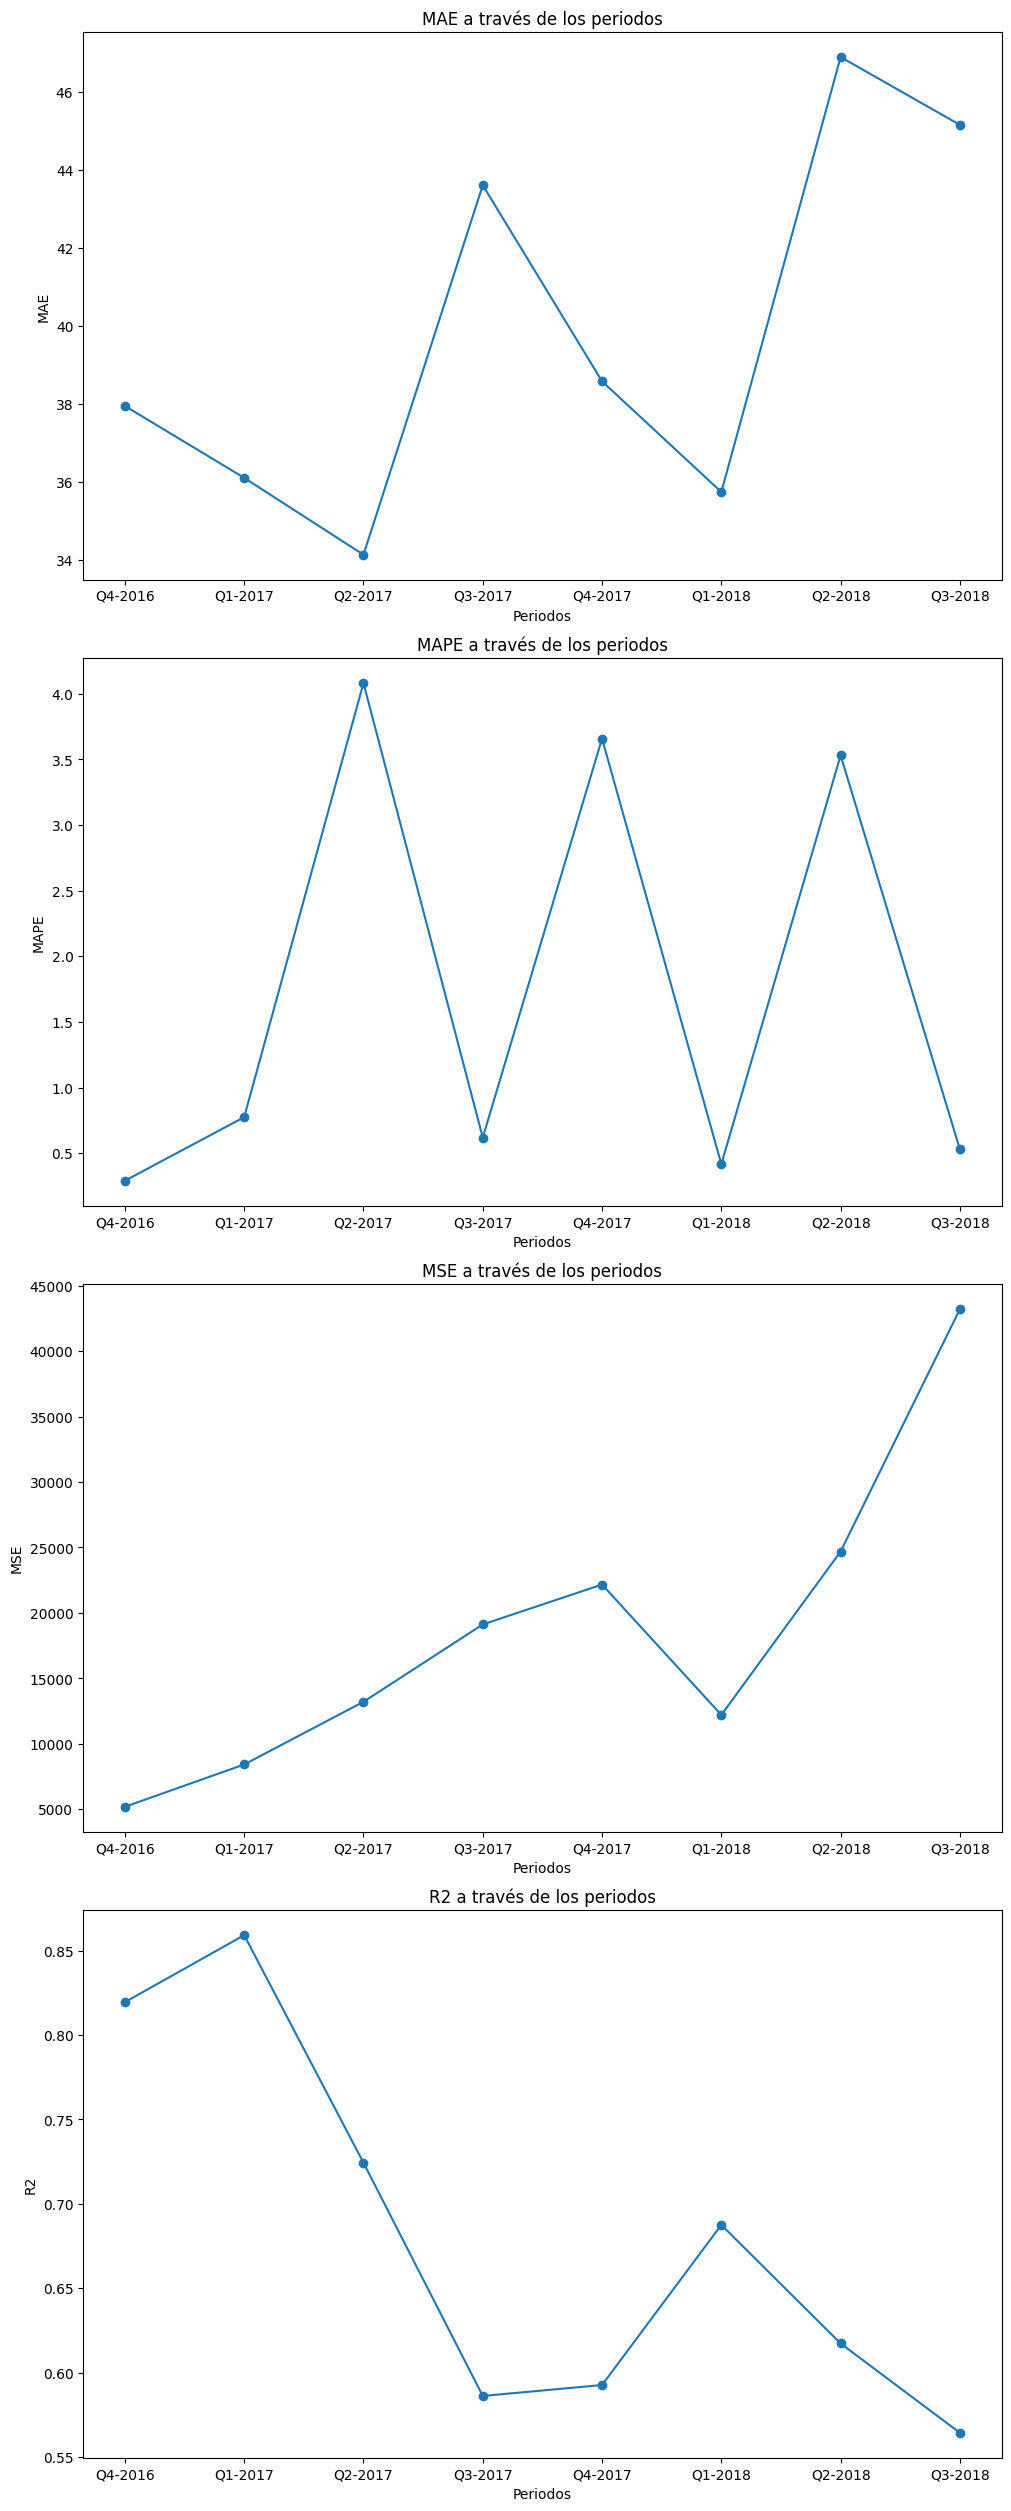

In [58]:
plot_metrics(
    tree_reg, periods, ['payment_sequential', 'payment_type', 'payment_installments',
       'order_status', 'review_score', 'price', 'freight_value',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_name_lenght', 'product_description_lenght', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state',
       'cantidad_vendedores_por_cliente', 'cantidad_productos_por_cliente',
       'cantidad_compras', 'cantidad_vendedores_por_compra',
       'cantidad_productos_por_compra', 'rel_freight_payment',
       'median_freight_prod', 'max_freight_prod', 'suma_freight_prod',
       'median_freight_cust', 'max_freight_cust', 'suma_freight_cust',
       'med_payment_sequential', 'max_payment_sequential',
       'suma_payment_sequential', 'volumen_producto', 'med_volumen_prod',
       'max_volumen_prod', 'min_volumen_prod', 'med_peso_prod',
       'max_peso_prod', 'min_peso_prod', 'pay_install_max', 'pay_install_prom',
       'pedidos_misma_ciudad', 'dif_purchase_delivered_carrier',
       'dif_purchase_delivered_customer', 'dif_delivered_customer_estimated',
       'med_dif_purchase_delivered_carrier',
       'min_dif_purchase_delivered_carrier',
       'max_dif_purchase_delivered_carrier'], tar, 
    {'MAE': mean_absolute_error, 'MAPE': mean_absolute_percentage_error, 'MSE': mean_squared_error, 
     'R2': r2_score}
)

# -------------------------------------------------------------